In [ ]:
# Project Name- CREDIT CARD FRAUD DETECTION

# About Dataset;
# This is simulated credit card transaction dataset containing legitimate and fraud detection and fraud transactions from the duration of 1st jan
# 2019-31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.


In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn as skl
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, recall_score, f1_score

In [2]:
data = pd.read_csv("C:/Users/saila/Downloads/archive/fraudTrain.csv")

In [3]:
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [4]:
# EDA PART

In [5]:
#understand data

In [6]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [7]:
data.tail()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0
1296674,1296674,2020-06-21 12:13:37,4292902571056973207,"fraud_Langosh, Wintheiser and Hyatt",food_dining,4.30,Jeffrey,Smith,M,135 Joseph Mountains,...,45.8433,-113.8748,218,"Therapist, horticultural",1995-08-16,8f7c8e4ab7f25875d753b422917c98c9,1371816817,46.565983,-114.186110,0


In [8]:
data.shape

(1296675, 23)

In [9]:
data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [10]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [11]:
data.nunique()

Unnamed: 0               1296675
trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [12]:
data.isna()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296671,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296672,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1296673,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
duplicate = data.duplicated()
print('No Of Duplicate Variables:',duplicate.sum())
data[duplicate]

No Of Duplicate Variables: 0


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


In [14]:
data['trans_date_trans_time'].unique()

array(['2019-01-01 00:00:18', '2019-01-01 00:00:44',
       '2019-01-01 00:00:51', ..., '2020-06-21 12:12:32',
       '2020-06-21 12:13:36', '2020-06-21 12:13:37'], dtype=object)

In [15]:
data['cc_num'].unique()

array([   2703186189652095,        630423337322,      38859492057661,
          3534093764340240,     375534208663984,    4767265376804500,
            30074693890476,    6011360759745864,    4922710831011201,
          2720830304681674,       4642894980163,     377234009633447,
           180042946491150,    5559857416065248,    3514865930894695,
          6011999606625827,    6011860238257910,    3565423334076143,
          2348245054386329, 4956828990005111019, 4469777115158234880,
          2305336922781618,     180048185037117,        630441765090,
       4428780983793657331,     343464013864032,     374930071163758,
          4334230547694630, 4225990116481262579,    4260059589824237,
           180094608895855, 4599735407877245080,        630412733309,
          2712209726293386,     374125201044065,     349612764943496,
          3598215285024754,     213141712584544,      30561214688470,
          4789911625179723,        676372984911,      30011465039817,
          4642255475

In [16]:
data['merchant'].unique()

array(['fraud_Rippin, Kub and Mann', 'fraud_Heller, Gutmann and Zieme',
       'fraud_Lind-Buckridge', 'fraud_Kutch, Hermiston and Farrell',
       'fraud_Keeling-Crist', 'fraud_Stroman, Hudson and Erdman',
       'fraud_Rowe-Vandervort', 'fraud_Corwin-Collins',
       'fraud_Herzog Ltd', 'fraud_Schoen, Kuphal and Nitzsche',
       'fraud_Rutherford-Mertz', 'fraud_Kerluke-Abshire',
       'fraud_Lockman Ltd', 'fraud_Kiehn Inc', 'fraud_Beier-Hyatt',
       'fraud_Schmidt and Sons', 'fraud_Lebsack and Sons',
       'fraud_Mayert Group', 'fraud_Konopelski, Schneider and Hartmann',
       'fraud_Schultz, Simonis and Little', 'fraud_Bauch-Raynor',
       'fraud_Harris Inc', 'fraud_Kling-Grant', 'fraud_Pacocha-Bauch',
       'fraud_Lesch Ltd', 'fraud_Kunde-Sanford', "fraud_Deckow-O'Conner",
       'fraud_Bruen-Yost', 'fraud_Kunze Inc',
       'fraud_Nitzsche, Kessler and Wolff',
       'fraud_Kihn, Abernathy and Douglas', 'fraud_Torphy-Goyette',
       'fraud_Balistreri-Nader', 'fraud_Bahrin

In [17]:
data['category'].unique()

array(['misc_net', 'grocery_pos', 'entertainment', 'gas_transport',
       'misc_pos', 'grocery_net', 'shopping_net', 'shopping_pos',
       'food_dining', 'personal_care', 'health_fitness', 'travel',
       'kids_pets', 'home'], dtype=object)

In [18]:
data['amt'].unique()

array([  4.97, 107.23, 220.11, ..., 754.81, 374.71, 255.52])

In [19]:
data['first'].unique()

array(['Jennifer', 'Stephanie', 'Edward', 'Jeremy', 'Tyler', 'Kelsey',
       'Steven', 'Heather', 'Melissa', 'Eddie', 'Theresa', 'Charles',
       'Jack', 'Christopher', 'Ronald', 'Lisa', 'Nathan', 'Justin',
       'Kenneth', 'Gregory', 'Jeffrey', 'Mary', 'Susan', 'Richard',
       'Jodi', 'Daniel', 'Scott', 'Brian', 'Aaron', 'Tammie', 'Jenna',
       'Xavier', 'Ashley', 'Margaret', 'Gina', 'Dorothy', 'Vicki',
       'Sabrina', 'Carlos', 'Sharon', 'Briana', 'Sandra', 'Christine',
       'Beth', 'James', 'Randall', 'Elizabeth', 'Savannah', 'Shawn',
       'Benjamin', 'Thomas', 'Jerry', 'Linda', 'Mark', 'Lauren',
       'Michelle', 'Guy', 'Jacob', 'Monica', 'Frank', 'Andrew', 'Louis',
       'Mario', 'Sarah', 'Taylor', 'Joseph', 'Erin', 'Barbara', 'Antonio',
       'Debbie', 'Ana', 'Robert', 'Christie', 'Gary', 'Tanner', 'Dylan',
       'Regina', 'Cheryl', 'Katherine', 'Matthew', 'Cynthia', 'Megan',
       'Brianna', 'Monique', 'Kelly', 'Jacqueline', 'Brenda', 'Sherry',
       'Tanya', 

In [20]:
data['last'].unique()

array(['Banks', 'Gill', 'Sanchez', 'White', 'Garcia', 'Conner',
       'Richards', 'Williams', 'Chase', 'Aguilar', 'Mendez', 'Blackwell',
       'Robles', 'Hill', 'Castaneda', 'Carson', 'Thomas', 'Gay',
       'Robinson', 'Graham', 'Rice', 'Wall', 'Washington', 'Waters',
       'Foster', 'Escobar', 'Martin', 'Simpson', 'Rogers', 'Harper',
       'Myers', 'Stanton', 'Brooks', 'Gilbert', 'Beltran', 'Lopez',
       'Curtis', 'Morrison', 'Zuniga', 'Mendoza', 'Johnson', 'Juarez',
       'Luna', 'Chung', 'Santos', 'Schwartz', 'Best', 'Lambert', 'Hunt',
       'Dillon', 'Mckee', 'Lewis', 'King', 'Harris', 'Cross', 'Davis',
       'Wood', 'Anderson', 'Choi', 'Shah', 'Thompson', 'Weber', 'Cohen',
       'Patterson', 'Holt', 'Crane', 'Fisher', 'Matthews', 'Johns',
       'Khan', 'Spencer', 'Chavez', 'Murray', 'Taylor', 'Koch', 'Hughes',
       'Howell', 'Carrillo', 'Nguyen', 'Williamson', 'Ortega', 'Lowe',
       'Meza', 'Barnes', 'Carroll', 'Bonilla', 'Mcclure', 'Johnston',
       'Schmidt', 'B

In [21]:
data['gender'].unique()

array(['F', 'M'], dtype=object)

In [22]:
data['street'].unique()

array(['561 Perry Cove', '43039 Riley Greens Suite 393',
       '594 White Dale Suite 530', '9443 Cynthia Court Apt. 038',
       '408 Bradley Rest', '4655 David Island',
       '889 Sarah Station Suite 624', '231 Flores Pass Suite 720',
       '6888 Hicks Stream Suite 954', '21326 Taylor Squares Suite 708',
       '1831 Faith View Suite 653', '43576 Kristina Islands',
       '3337 Lisa Divide', '5916 Susan Bridge Apt. 939',
       '1632 Cohen Drive Suite 639', '870 Rocha Drive',
       '44259 Beth Station Suite 215', '4923 Campbell Pines Suite 717',
       '268 Hayes Rue Suite 811', '269 Sanchez Rapids', '4005 Dana Glens',
       '21447 Powell Circle', '2481 Mills Lock',
       '759 Erin Mount Suite 956', '7683 Natasha Way Apt. 945',
       '551 Zachary Freeway', '61390 Hayes Port', '7483 Navarro Flats',
       '2711 Duran Pines', '969 Huerta Path Apt. 270',
       '57887 Gutierrez Harbor', '39787 Pamela Fall Suite 639',
       '445 Jerry Lights Apt. 081', '50872 Alex Plain Suite 088'

In [23]:
data['city'].unique()

array(['Moravian Falls', 'Orient', 'Malad City', 'Boulder', 'Doe Hill',
       'Dublin', 'Holcomb', 'Edinburg', 'Manor', 'Clarksville',
       'Clarinda', 'Shenandoah Junction', 'Saint Petersburg', 'Grenada',
       'High Rolls Mountain Park', 'Harrington Park', 'Lahoma',
       'Carlisle', 'Harborcreek', 'Elizabeth', 'Methuen', 'Moulton',
       'Plainfield', 'May', 'Waukesha', 'Bailey', 'Romulus', 'Freedom',
       'Honokaa', 'Valentine', 'Westfir', 'Tiptonville', 'Republic',
       'Baton Rouge', 'Washington', 'Big Creek', 'Bellmore', 'Florence',
       'Allentown', 'Moriches', 'Esbon', 'Chatham', 'Thompson',
       'North Prairie', 'Laredo', 'Grant', 'Conway', 'New Goshen',
       'Sunflower', 'Enola', 'Roosevelt', 'Pointe Aux Pins', 'Dallas',
       'Jay', 'North Tonawanda', 'Athena', 'Chester', 'Elkhart',
       'Surrency', 'Arcadia', 'Gaithersburg', 'Bowdoin', 'Heart Butte',
       'San Jose', 'Rumely', 'Cranks', 'Ravenna', 'Utica', 'Uledi',
       'Naples', 'Thida', 'Parks', 'C

In [24]:
data['state'].unique()

array(['NC', 'WA', 'ID', 'MT', 'VA', 'PA', 'KS', 'TN', 'IA', 'WV', 'FL',
       'CA', 'NM', 'NJ', 'OK', 'IN', 'MA', 'TX', 'WI', 'MI', 'WY', 'HI',
       'NE', 'OR', 'LA', 'DC', 'KY', 'NY', 'MS', 'UT', 'AL', 'AR', 'MD',
       'GA', 'ME', 'AZ', 'MN', 'OH', 'CO', 'VT', 'MO', 'SC', 'NV', 'IL',
       'NH', 'SD', 'AK', 'ND', 'CT', 'RI', 'DE'], dtype=object)

In [25]:
data['zip'].unique()

array([28654, 99160, 83252, 59632, 24433, 18917, 67851, 22824, 15665,
       37040, 51632, 25442, 33710, 96038, 88325,  7640, 73754, 47838,
       16421,  7208,  1844, 52572,  7060, 76857, 53186, 27807, 48174,
       83120, 96727, 69201, 97492, 38079, 49879, 70808, 20012, 40914,
       11710, 39073, 18103, 11955, 66941, 12037, 84540, 53153, 78040,
       35747, 98238, 47863, 38778, 72047, 73564, 49775, 75210, 32565,
       14120, 97813, 21619, 50073, 31563, 49613, 20882,  4287, 59448,
       95148, 49826, 40820, 68869, 67584, 15484, 34112, 72165, 86018,
       47110, 82514, 22719, 39825,  1545, 56117, 16048, 43985, 80120,
        5461, 64659, 49628, 84532, 44412, 29819, 23860, 90250, 20895,
       89319, 51521, 52768, 75092, 33470, 71762, 15324, 15056, 82227,
       11978, 10162, 56548,  7711, 93529, 97476, 68950, 36009,  1612,
       68881, 22853, 15432, 73027, 42701, 13342, 39653, 61454, 70531,
       13615, 23937, 63021, 95537, 33417, 12992, 24266, 36749, 22015,
       50595, 66070,

In [26]:
data['lat'].unique()

array([36.0788, 48.8878, 42.1808, 46.2306, 38.4207, 40.375 , 37.9931,
       38.8432, 40.3359, 36.522 , 40.7491, 39.3716, 27.7898, 41.6125,
       32.9396, 40.9918, 36.385 , 38.9763, 42.1767, 40.6747, 42.728 ,
       40.6866, 40.6152, 31.9571, 42.9993, 35.8072, 42.2203, 43.0172,
       20.0827, 42.8062, 43.7575, 36.3846, 46.368 , 30.4066, 38.9757,
       37.1046, 40.6729, 32.153 , 40.5891, 40.8095, 39.7562, 42.3496,
       38.9999, 42.9385, 27.5155, 34.4959, 48.34  , 39.5803, 33.5567,
       35.2087, 34.847 , 45.7549, 32.7699, 30.8985, 43.0498, 45.8289,
       38.9583, 41.8114, 31.6489, 44.5232, 39.2335, 44.0575, 48.2777,
       37.3304, 46.3481, 36.7558, 41.0233, 38.6411, 39.8936, 26.1184,
       35.5762, 35.2563, 38.097 , 43.0048, 38.5095, 30.9788, 42.2848,
       43.5336, 41.0472, 40.0113, 39.5994, 44.3346, 39.7795, 44.5995,
       38.5677, 41.0935, 34.0326, 37.2876, 33.9143, 39.0298, 39.3426,
       41.4768, 41.6858, 33.6372, 26.7383, 33.3398, 40.1008, 40.5662,
       42.73  , 40.8

In [27]:
data['long'].unique()

array([ -81.1781, -118.2105, -112.262 , -112.1138,  -79.4629,  -75.2045,
       -100.9893,  -78.6003,  -79.6607,  -87.349 ,  -95.038 ,  -77.8229,
        -82.7243, -122.5258, -105.8189,  -73.98  ,  -98.0727,  -87.3667,
        -79.9416,  -74.2239,  -71.181 ,  -92.6833,  -74.415 ,  -98.9656,
        -88.2196,  -78.0892,  -83.3583, -111.0292, -155.488 , -100.6215,
       -122.481 ,  -89.4649,  -87.9938,  -91.1468,  -77.0282,  -83.5706,
        -73.5365,  -90.1217,  -75.4645,  -72.8229,  -98.4462,  -73.5873,
       -109.615 ,  -88.395 ,  -99.4986,  -86.259 , -122.3456,  -87.4616,
        -90.5451,  -92.2123,  -98.9836,  -84.447 ,  -96.743 ,  -87.1332,
        -78.851 , -118.4971,  -76.2842,  -93.4855,  -82.1982,  -86.2061,
        -77.1458,  -69.9656, -112.8456, -121.7913,  -87.0436,  -83.1838,
        -98.9041, -100.138 ,  -79.7856,  -81.7361,  -91.4539, -111.95  ,
        -86.1723, -108.8964,  -78.2638,  -84.7373,  -71.7205,  -95.6515,
        -79.8089,  -80.9701, -105.0044,  -73.098 , 

In [28]:
data['city_pop'].unique()

array([   3495,     149,    4154,    1939,      99,    2158,    2691,
          6018,    1472,  151785,    7297,    1925,  341043,     589,
           899,    4664,    1078,    4081,    2518,  124967,   47249,
          1132,   71485,    1791,   95015,    6629,   31515,     471,
          4878,    4005,     597,    5577,    1038,  378909,  601723,
           467,   34496,   19685,  166081,    3285,     242,    4015,
            46,    2328,  248858,    5901,      85,     205,    1686,
           969,     551,      95, 1263321,    5719,   45100,    1302,
          5848,    1195,    1324,     680,  135332,    3224,     743,
        973849,     137,     581,    2202,     269,     328,  276002,
           111,     759,     350,    1645,     395,    1461,   35299,
           399,     139,     128,  320420,    4542,     964,     372,
          9772,    2644,    1523,   31970,   93193,   19054,     450,
          2036,    1426,   46563,   26551,    2501,     632,    1140,
           241,    3

In [29]:
data['job'].unique()

array(['Psychologist, counselling', 'Special educational needs teacher',
       'Nature conservation officer', 'Patent attorney',
       'Dance movement psychotherapist', 'Transport planner',
       'Arboriculturist', 'Designer, multimedia',
       'Public affairs consultant', 'Pathologist', 'IT trainer',
       'Systems developer', 'Engineer, land', 'Systems analyst',
       'Naval architect', 'Radiographer, diagnostic',
       'Programme researcher, broadcasting/film/video', 'Energy engineer',
       'Event organiser', 'Operational researcher', 'Market researcher',
       'Probation officer', 'Leisure centre manager',
       'Corporate investment banker', 'Therapist, occupational',
       'Call centre manager', 'Police officer',
       'Education officer, museum', 'Physiotherapist', 'Network engineer',
       'Forensic psychologist', 'Geochemist',
       'Armed forces training and education officer',
       'Designer, furniture', 'Optician, dispensing',
       'Psychologist, forensic

In [30]:
data['dob'].unique()

array(['1988-03-09', '1978-06-21', '1962-01-19', '1967-01-12',
       '1986-03-28', '1961-06-19', '1993-08-16', '1947-08-21',
       '1941-03-07', '1974-03-28', '1990-07-13', '1966-02-14',
       '1989-02-28', '1945-12-21', '1967-08-30', '1965-06-30',
       '1952-07-06', '1938-03-15', '1946-02-02', '1980-12-21',
       '1980-11-22', '1961-02-14', '1974-07-19', '1965-07-26',
       '1946-01-02', '1962-08-13', '1971-11-05', '1967-08-02',
       '1966-12-03', '1945-03-15', '1961-05-19', '1964-12-30',
       '1964-04-22', '1977-02-22', '1970-07-20', '1984-06-04',
       '1970-10-21', '1984-12-24', '1998-10-01', '1988-04-27',
       '1987-07-18', '1971-10-14', '1987-04-23', '1942-01-06',
       '1971-01-28', '1972-07-25', '1984-09-01', '1960-01-06',
       '1986-11-06', '1954-01-05', '1970-09-27', '1994-02-09',
       '1942-11-24', '1994-11-05', '1993-10-25', '1976-10-18',
       '1981-02-15', '1974-03-13', '1926-07-12', '1966-12-21',
       '1936-03-28', '1997-08-22', '1972-05-04', '1955-

In [31]:
data['trans_num'].unique()

array(['0b242abb623afc578575680df30655b9',
       '1f76529f8574734946361c461b024d99',
       'a1a22d70485983eac12b5b88dad1cf95', ...,
       '483f52fe67fabef353d552c1e662974c',
       'd667cdcbadaaed3da3f4020e83591c83',
       '8f7c8e4ab7f25875d753b422917c98c9'], dtype=object)

In [32]:
data['unix_time'].unique()

array([1325376018, 1325376044, 1325376051, ..., 1371816752, 1371816816,
       1371816817], dtype=int64)

In [33]:
data['merch_lat'].unique()

array([36.011293, 49.159047, 43.150704, ..., 33.619513, 42.78894 ,
       46.565983])

In [34]:
data['merch_long'].unique()

array([ -82.048315, -118.186462, -112.154481, ..., -105.130529,
       -103.24116 , -114.18611 ])

In [35]:
data['is_fraud'].unique()

array([0, 1], dtype=int64)

In [36]:
#cleaning the data

In [37]:
data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [38]:
#relationship analysis

In [39]:
corelation=data.corr()

In [ ]:
sns.pairplot(data)

In [ ]:
fraud = data.loc[data['cc_num']==1]
normal = data.loc[data['cc_num']==0]

In [ ]:
fraud.amt.describe()

In [ ]:
#EDA PART

In [ ]:
normal.amt.describe()

In [ ]:
sns.relplot(x= 'amt', y= "cc_num",hue='' data=data)

In [5]:
data.isnull().values.any()

False

In [6]:
data["amt"].describe()

count    1.296675e+06
mean     7.035104e+01
std      1.603160e+02
min      1.000000e+00
25%      9.650000e+00
50%      4.752000e+01
75%      8.314000e+01
max      2.894890e+04
Name: amt, dtype: float64

In [22]:
non_fraud = len(data[data.is_fraud == 0])
fraud = len(data[data.is_fraud == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  1289169
Number of Fraud transactions:  7506
Percentage of Fraud transactions: 0.5789


In [18]:
dataframe=pd.read_csv("C:/Users/saila/Downloads/archive/fraudTrain.csv")

In [10]:
non_fraud = len(dataframe[data.is_fraud == 0])
fraud = len(dataframe[dataframe.is_fraud == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100

print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))

Number of Genuine transactions:  1289169
Number of Fraud transactions:  7506
Percentage of Fraud transactions: 0.5789


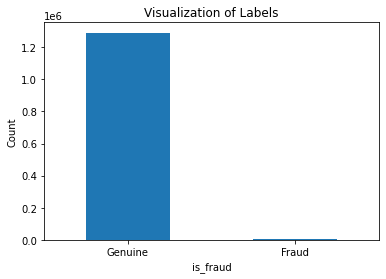

In [11]:
import matplotlib.pyplot as plt

labels = ["Genuine", "Fraud"]
count_classes = dataframe.value_counts(dataframe['is_fraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

In [19]:
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataframe["NormalizedAmount"] = scaler.fit_transform(dataframe["amt"].values.reshape(-1, 1))
dataframe.drop(["amt", "trans_date_trans_time"], inplace= True, axis= 1)

Y = dataframe["is_fraud"]
X = dataframe.drop(["is_fraud"], axis= 1)

In [20]:
from sklearn.model_selection import train_test_split

(train_X, test_X, train_Y, test_Y) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of train_X: ", train_X.shape)
print("Shape of test_X: ", test_X.shape)

Shape of train_X:  (907672, 21)
Shape of test_X:  (389003, 21)


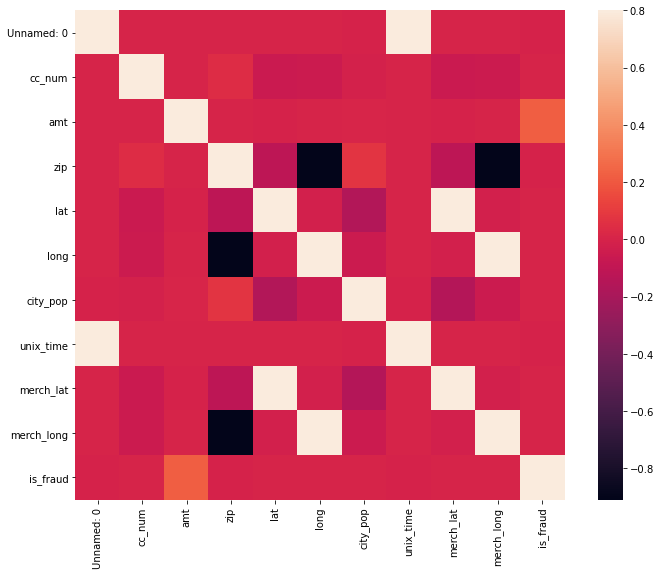

In [31]:
# Correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [78]:
# dividing the X and the Y from the dataset
X = data.drop(['is_fraud'], axis = 1)
Y = data["is_fraud"]
print(X.shape)
print(Y.shape)
# getting just the values for the sake of processing 
# (its a numpy array with no columns)
xData = X.values
yData = Y.values

(1296675, 21)
(1296675,)


In [79]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

In [127]:
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [216]:
data['trans_date_trans_time'] = pd.to_datetime(data['trans_date_trans_time'])

In [217]:
data.dtypes['trans_date_trans_time']

dtype('<M8[ns]')

In [83]:
data['trans_hour'] = data['trans_date_trans_time'].dt.hour
data['trans_hour']

0           0
1           0
2           0
3           0
4           0
           ..
1296670    12
1296671    12
1296672    12
1296673    12
1296674    12
Name: trans_hour, Length: 1296675, dtype: int64

In [84]:
data['year_month'] = data['trans_date_trans_time'].dt.to_period('M')
data['year_month']

0          2019-01
1          2019-01
2          2019-01
3          2019-01
4          2019-01
            ...   
1296670    2020-06
1296671    2020-06
1296672    2020-06
1296673    2020-06
1296674    2020-06
Name: year_month, Length: 1296675, dtype: period[M]

In [85]:
data['day_of_week'] = data['trans_date_trans_time'].dt.day_name()
data['day_of_week']

0          Tuesday
1          Tuesday
2          Tuesday
3          Tuesday
4          Tuesday
            ...   
1296670     Sunday
1296671     Sunday
1296672     Sunday
1296673     Sunday
1296674     Sunday
Name: day_of_week, Length: 1296675, dtype: object

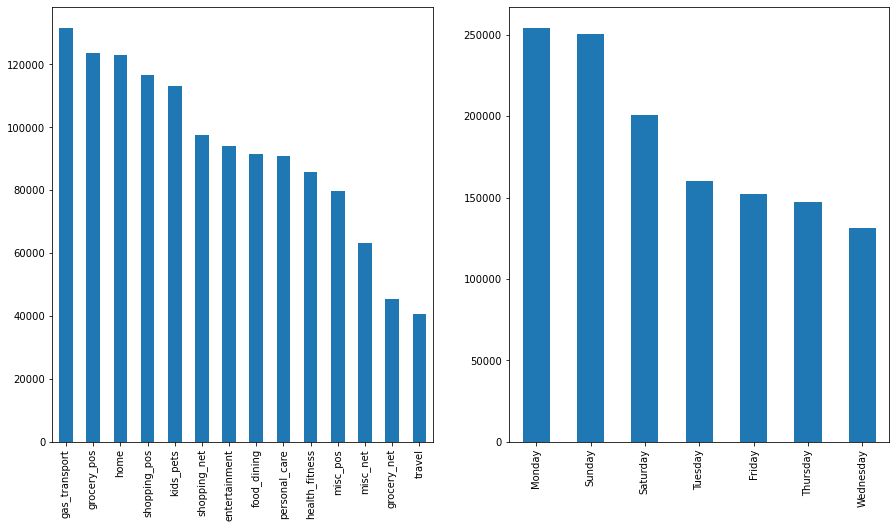

In [86]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data['category'].value_counts().plot.bar();
plt.subplot(1,2,2)
data['day_of_week'].value_counts().plot.bar();

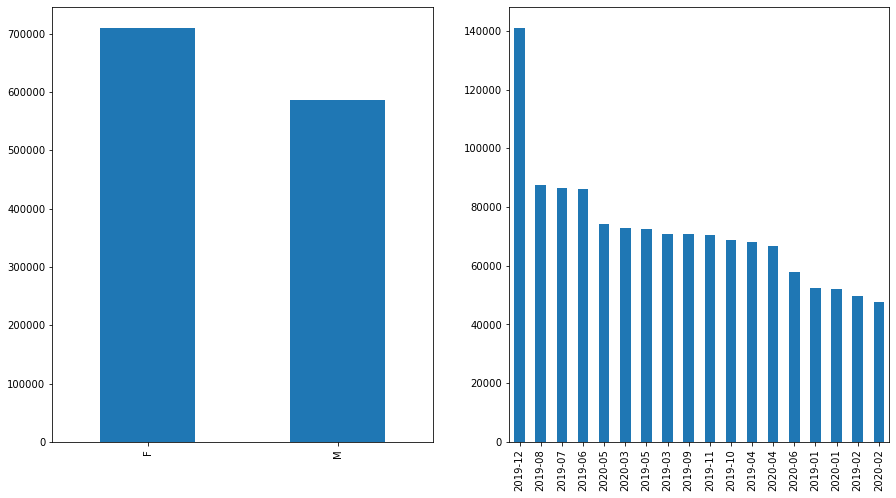

In [87]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
data['gender'].value_counts().plot.bar();
plt.subplot(1,2,2)
data['year_month'].value_counts().plot.bar();

In [88]:
#dependent and independent variable

In [89]:
x = data.iloc[:,0:22].values
x

array([[Timestamp('2019-01-01 00:00:18'), 2703186189652095,
        'fraud_Rippin, Kub and Mann', ..., 36.011293, -82.048315, 0],
       [Timestamp('2019-01-01 00:00:44'), 630423337322,
        'fraud_Heller, Gutmann and Zieme', ..., 49.159047, -118.186462,
        0],
       [Timestamp('2019-01-01 00:00:51'), 38859492057661,
        'fraud_Lind-Buckridge', ..., 43.150704, -112.154481, 0],
       ...,
       [Timestamp('2020-06-21 12:12:32'), 3514865930894695,
        'fraud_Stiedemann Ltd', ..., 33.619513, -105.130529, 0],
       [Timestamp('2020-06-21 12:13:36'), 2720012583106919,
        'fraud_Reinger, Weissnat and Strosin', ..., 42.78894, -103.24116,
        0],
       [Timestamp('2020-06-21 12:13:37'), 4292902571056973207,
        'fraud_Langosh, Wintheiser and Hyatt', ..., 46.565983,
        -114.18611, 0]], dtype=object)

In [90]:
y= data.iloc[0:,21].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [92]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(907672, 22)
(389003, 22)
(907672,)
(389003,)


In [ ]:
# find  relation between Dependent variable vs Independant variable


In [93]:
features = data.iloc[:,0:21].columns.tolist()
features

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long']

In [94]:
target = data.iloc[:,21].name
target

'is_fraud'

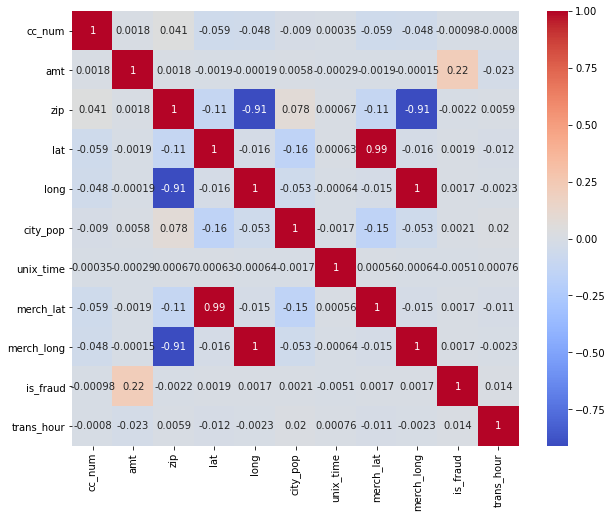

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)
plt.show()

In [96]:
## slicing the data into dependent and independent variable
# x = independent variable
# y = dependent variable

In [97]:
x = data.iloc[:,0:22].values
x

array([[Timestamp('2019-01-01 00:00:18'), 2703186189652095,
        'fraud_Rippin, Kub and Mann', ..., 36.011293, -82.048315, 0],
       [Timestamp('2019-01-01 00:00:44'), 630423337322,
        'fraud_Heller, Gutmann and Zieme', ..., 49.159047, -118.186462,
        0],
       [Timestamp('2019-01-01 00:00:51'), 38859492057661,
        'fraud_Lind-Buckridge', ..., 43.150704, -112.154481, 0],
       ...,
       [Timestamp('2020-06-21 12:12:32'), 3514865930894695,
        'fraud_Stiedemann Ltd', ..., 33.619513, -105.130529, 0],
       [Timestamp('2020-06-21 12:13:36'), 2720012583106919,
        'fraud_Reinger, Weissnat and Strosin', ..., 42.78894, -103.24116,
        0],
       [Timestamp('2020-06-21 12:13:37'), 4292902571056973207,
        'fraud_Langosh, Wintheiser and Hyatt', ..., 46.565983,
        -114.18611, 0]], dtype=object)

In [98]:
y= data.iloc[0:,21].values
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
##split the data into training and test
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=101)

In [100]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(907672, 22)
(389003, 22)
(907672,)
(389003,)


In [101]:
# finding the relation with Dependent variable vs Independant variable
features = data.iloc[:,0:21].columns.tolist()
features

['trans_date_trans_time',
 'cc_num',
 'merchant',
 'category',
 'amt',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'zip',
 'lat',
 'long',
 'city_pop',
 'job',
 'dob',
 'trans_num',
 'unix_time',
 'merch_lat',
 'merch_long']

In [102]:
pd.DataFrame(data.isnull().value_counts())

,,,,,,,,,,,,,,,,,,,,,,,,,0
trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,trans_hour,year_month,day_of_week,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,1296675


In [103]:
target = data.iloc[:,21].name
target

'is_fraud'

In [104]:
##Feature Engineering ##binning
data['bin'] = pd.cut(data['is_fraud'], bins=[0,30,70,100], labels=["Low", "Mid", "High"])
data['bin']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
1296670    NaN
1296671    NaN
1296672    NaN
1296673    NaN
1296674    NaN
Name: bin, Length: 1296675, dtype: category
Categories (3, object): ['Low' < 'Mid' < 'High']

In [105]:
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})
data

,value
0,2
1,45
2,-23
3,85
4,28
5,2
6,35
7,-12


In [106]:
##Log Transformation
data['log+1'] = (data['value']+1).transform(np.log)
data['log+1']

0    1.098612
1    3.828641
2         NaN
3    4.454347
4    3.367296
5    1.098612
6    3.583519
7         NaN
Name: log+1, dtype: float64

In [107]:
data['log'] = (data['value']-data['value'].min()+1) .transform(np.log)
data['log']

0    3.258097
1    4.234107
2    0.000000
3    4.691348
4    3.951244
5    3.258097
6    4.077537
7    2.484907
Name: log, dtype: float64

In [108]:
##Label encoder
from sklearn.preprocessing import LabelEncoder
print (y[:21])
gender_encoder = LabelEncoder()
y= gender_encoder.fit_transform(y)
y

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

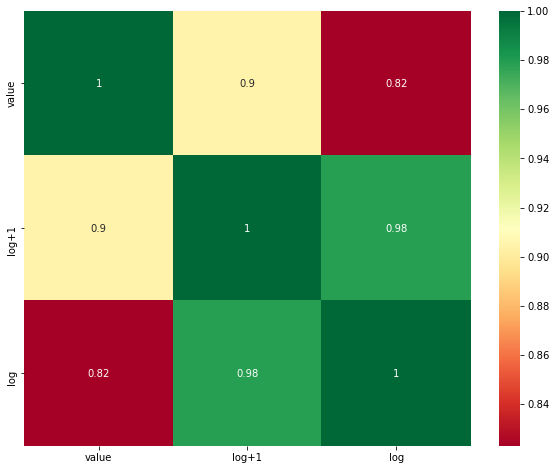

In [109]:
## Correlation
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [110]:
##Standardization
data = pd.DataFrame({'value':[2,45, -23, 85, 28, 2, 35, -12]})

data['standardized'] = (data['value'] - data['value'].mean()) / data['value'].std()
data['standardized']

0   -0.518878
1    0.703684
2   -1.229670
3    1.840952
4    0.220346
5   -0.518878
6    0.419367
7   -0.916922
Name: standardized, dtype: float64

In [111]:
## Normalization
data = pd.DataFrame({'value':[4,45, -43, 75, 18, 2, 35, -14]})

data['normalized'] = (data['value'] - data['value'].min()) / (data['value'].max() - data['value'].min())
data['normalized']

0    0.398305
1    0.745763
2    0.000000
3    1.000000
4    0.516949
5    0.381356
6    0.661017
7    0.245763
Name: normalized, dtype: float64

In [112]:
## Importing standard scalar module 
from sklearn.preprocessing import StandardScaler
  
scalar = StandardScaler()
  
# fitting
scalar.fit(data)
scaled_data = scalar.transform(data)
  
# Importing PCA
from sklearn.decomposition import PCA
  
# Let's say, components = 2
pca = PCA(n_components = 2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
  
x_pca.shape

(8, 2)

In [113]:
variance = pca.explained_variance_ratio_
variance

array([1.00000000e+00, 3.20456962e-32])

In [114]:
!pip install SMOTE

In [115]:
!pip install imblearn

In [116]:
from imblearn import under_sampling, over_sampling

In [117]:
from sklearn.model_selection import train_test_split # train-test split
from sklearn.metrics import confusion_matrix, classification_report # classification metrics
from imblearn.over_sampling import SMOTE # SMOTE
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler # scaling methods
from sklearn.model_selection import GridSearchCV # grid search cross validation
from sklearn.model_selection import RandomizedSearchCV # randomized search cross validation

# supervised learning algorithms
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbbors
from sklearn.naive_bayes import GaussianNB # Gaussain Naive Bayes
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting Classifier
from sklearn.ensemble import BaggingClassifier # Bootstrap Aggregating Classifier

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [120]:
!pip install -U imbalanced-learn

In [218]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [219]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [220]:
# Binarizing Gender column
def gender_binarizer(x):
    if x=='F':
        return 1
    if x=='M':
        return 0
    
data['gender'] = data['gender'].transform(gender_binarizer)

In [182]:
# Seperating nominal from numeric
# Note:There are almost 2M records in dfz.In order to avoid the heavy calculation,only the first 100000 rows were selected.
df2 = data.loc[:99999,data.dtypes!=np.object]
df2

<ipython-input-182-a71534379a56>:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df2 = data.loc[:99999,data.dtypes!=np.object]


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
0,0,2703186189652095,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0
1,1,630423337322,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0
2,2,38859492057661,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0
3,3,3534093764340240,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0
4,4,375534208663984,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,2475085306462014,95.14,56152,44.2378,-95.2739,1507,1330443409,44.718105,-95.843397,0
99996,99996,4005676619255478,8.75,70726,30.4590,-90.9027,71335,1330443447,29.931844,-90.610715,0
99997,99997,3519232971341141,34.20,43903,40.4731,-80.9596,2208,1330443454,41.076153,-80.506107,0
99998,99998,4040099974063068803,73.11,58769,48.3396,-102.2400,229,1330443491,48.535070,-102.524262,0


In [183]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


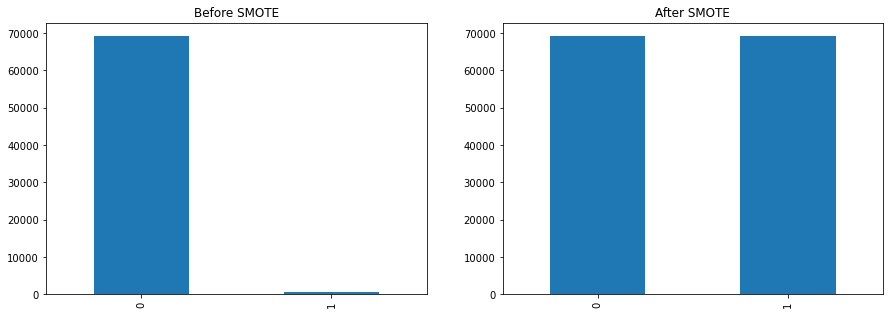

In [184]:
sm = SMOTE()
X_train_new, y_train_new = sm.fit_resample(X_train, y_train.ravel())

# to demonstrate the effect of SMOTE over imbalanced datasets
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize =(15, 5))
ax1.set_title('Before SMOTE')
pd.Series(y_train).value_counts().plot.bar(ax=ax1)

ax2.set_title('After SMOTE')  
pd.Series(y_train_new).value_counts().plot.bar(ax=ax2)

plt.show()

In [185]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [186]:
X = df2.drop(['cc_num','is_fraud'],axis=1)
y = df2['is_fraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [187]:
X_train, y_train = sm.fit_resample(X_train, y_train.ravel())

In [188]:
X_train, y_train

(        Unnamed: 0          amt    zip      lat      long  city_pop  \
 0            64304    43.170000  73564  34.8470  -98.9836       551   
 1            78145    60.110000   7747  40.4109  -74.2380     30770   
 2            19755     4.360000  88325  32.9396 -105.8189       899   
 3            78591    24.930000  66616  39.0645  -95.6413    163415   
 4            42070     9.710000  76857  31.9571  -98.9656      1791   
 ...            ...          ...    ...      ...       ...       ...   
 138603       88624   531.325367  22046  38.8856  -77.1802    116155   
 138604       55567  1075.731091  58569  46.1838 -101.2589        77   
 138605       14761   429.788412  34120  26.3304  -81.5871    276002   
 138606       38234    16.961859  33872  27.4703  -81.4872     50835   
 138607       95952   314.112386  68375  40.0456  -97.4735       121   
 
          unix_time  merch_lat  merch_long  
 0       1328640675  33.895247  -98.575664  
 1       1329355964  40.419608  -73.847281  

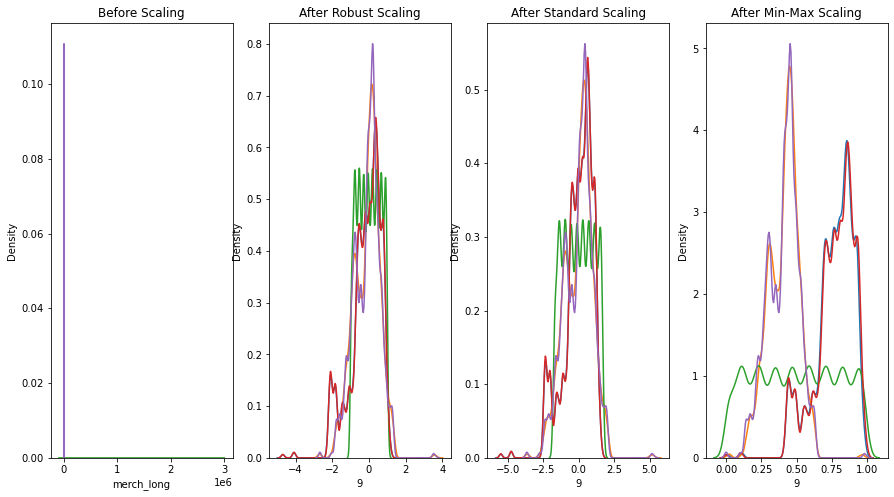

In [189]:
# to compare the effect of each scaler on our dataset
scaler = RobustScaler()
robust_data = scaler.fit_transform(df2)
robust_data = pd.DataFrame(robust_data)
  
scaler = StandardScaler()
standard_data = scaler.fit_transform(df2)
standard_data = pd.DataFrame(standard_data)
  
scaler = MinMaxScaler()
minmax_data = scaler.fit_transform(df2)
minmax_data = pd.DataFrame(minmax_data)

# using KDE plot
#Note: some columns are opted out in order to speed up the process
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(15, 8))
ax1.set_title('Before Scaling')
sns.kdeplot(df2['merch_long'], ax = ax1)
sns.kdeplot(df2['merch_lat'], ax = ax1)
sns.kdeplot(df2['city_pop'], ax = ax1)
sns.kdeplot(df2['long'], ax = ax1)
sns.kdeplot(df2['lat'], ax = ax1)


ax2.set_title('After Robust Scaling')  
sns.kdeplot(robust_data[9], ax = ax2)
sns.kdeplot(robust_data[8], ax = ax2)
sns.kdeplot(robust_data[7], ax = ax2)
sns.kdeplot(robust_data[5], ax = ax2)
sns.kdeplot(robust_data[4], ax = ax2)


ax3.set_title('After Standard Scaling')  
sns.kdeplot(standard_data[9], ax = ax3)
sns.kdeplot(standard_data[8], ax = ax3)
sns.kdeplot(standard_data[7], ax = ax3)
sns.kdeplot(standard_data[5], ax = ax3)
sns.kdeplot(standard_data[4], ax = ax3)


ax4.set_title('After Min-Max Scaling')  
sns.kdeplot(minmax_data[9], ax = ax4)
sns.kdeplot(minmax_data[8], ax = ax4)
sns.kdeplot(minmax_data[7], ax = ax4)
sns.kdeplot(minmax_data[5], ax = ax4)
sns.kdeplot(minmax_data[4], ax = ax4)

plt.show()

In [190]:
scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [191]:
X_test

array([[ 0.09876125, -0.23818473,  0.91220058, ...,  0.11475494,
        -0.75084761, -1.15661982],
       [ 0.02806056, -0.09990764,  0.204609  , ...,  0.03719546,
         1.4629592 , -0.40239355],
       [ 0.18753241, -0.04756339, -0.98799981, ...,  0.1806151 ,
         0.6500556 ,  0.836432  ],
       ...,
       [-0.83164179, -0.16385671,  0.00778265, ..., -0.81990233,
         0.4390847 ,  0.29320834],
       [ 0.16660763, -0.12093116, -0.32435455, ...,  0.16329525,
        -1.81539855,  0.32482543],
       [-1.04060208, -0.23183068, -0.04678908, ..., -1.03485656,
         0.33490872,  0.12472046]])

In [192]:
X_train

array([[ 0.26262751, -0.15738008,  0.59830832, ...,  0.26315173,
        -0.81793273, -0.6825111 ],
       [ 0.54684717, -0.12276995, -0.9353155 , ...,  0.55095304,
         0.13430516,  0.80312467],
       [-0.65216923, -0.23667283,  0.9422593 , ..., -0.63267651,
        -0.94089029, -1.16166615],
       ...,
       [-0.75471911,  0.63252043, -0.32078945, ..., -0.76150469,
        -1.97679567,  0.35040686],
       [-0.27271   , -0.21092596, -0.32656818, ..., -0.28703844,
        -1.72074142,  0.36532812],
       [ 0.91250712,  0.39618261,  0.47739771, ...,  0.89875821,
         0.01658856, -0.58231003]])

In [135]:
# GUASSIAN NAIVE BAYES

In [193]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print('\n')
print(classification_report(y_test,gnb_pred))

[[28721   985]
 [   92   202]]


              precision    recall  f1-score   support

           0       1.00      0.97      0.98     29706
           1       0.17      0.69      0.27       294

    accuracy                           0.96     30000
   macro avg       0.58      0.83      0.63     30000
weighted avg       0.99      0.96      0.97     30000



In [194]:
# RANDOM FOREST

In [196]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))


[[29460   246]
 [   54   240]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29706
           1       0.49      0.82      0.62       294

    accuracy                           0.99     30000
   macro avg       0.75      0.90      0.81     30000
weighted avg       0.99      0.99      0.99     30000



In [197]:
# DECISION TREE

In [198]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree_pred = dtree.predict(X_test)

print(confusion_matrix(y_test,dtree_pred))
print('\n')
print(classification_report(y_test,dtree_pred))

[[28988   718]
 [   61   233]]


              precision    recall  f1-score   support

           0       1.00      0.98      0.99     29706
           1       0.25      0.79      0.37       294

    accuracy                           0.97     30000
   macro avg       0.62      0.88      0.68     30000
weighted avg       0.99      0.97      0.98     30000



In [199]:
!pip install -U imbalanced-learn

In [200]:
# ADABOOST

In [203]:
adabc = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200)
adabc.fit(X_train,y_train)
adabc_pred = adabc.predict(X_test)

print(confusion_matrix(y_test,adabc_pred))
print('\n')
print(classification_report(y_test,adabc_pred))

[[28317  1389]
 [   58   236]]


              precision    recall  f1-score   support

           0       1.00      0.95      0.98     29706
           1       0.15      0.80      0.25       294

    accuracy                           0.95     30000
   macro avg       0.57      0.88      0.61     30000
weighted avg       0.99      0.95      0.97     30000



In [204]:
# KNN


In [205]:
param_grid = {'n_neighbors': range(1,20)}
clf = RandomizedSearchCV(KNeighborsClassifier(), param_grid)
clf.fit(X_train,y_train)
clf_pred = clf.predict(X_test)

In [206]:
### Determining the number of neighbors using RandomizedSearchCV
param_grid = {'n_neighbors': range(1,20)}
knn = RandomizedSearchCV(KNeighborsClassifier(), param_grid, verbose=3)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ..................................n_neighbors=2; total time=   2.2s
[CV 2/5] END ..................................n_neighbors=2; total time=   2.1s
[CV 3/5] END ..................................n_neighbors=2; total time=   2.1s
[CV 4/5] END ..................................n_neighbors=2; total time=   2.1s
[CV 5/5] END ..................................n_neighbors=2; total time=   2.1s
[CV 1/5] END ..................................n_neighbors=6; total time=   2.5s
[CV 2/5] END ..................................n_neighbors=6; total time=   2.5s
[CV 3/5] END ..................................n_neighbors=6; total time=   2.5s
[CV 4/5] END ..................................n_neighbors=6; total time=   2.5s
[CV 5/5] END ..................................n_neighbors=6; total time=   2.5s
[CV 1/5] END .................................n_neighbors=16; total time=   3.0s
[CV 2/5] END .................................n_

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   verbose=3)

In [207]:
knn.best_params_ # best parameter

{'n_neighbors': 2}

In [208]:
knn_pred = knn.predict(X_test)
print(confusion_matrix(y_test,knn_pred))
print('\n')
print(classification_report(y_test,knn_pred))

[[29372   334]
 [   45   249]]


              precision    recall  f1-score   support

           0       1.00      0.99      0.99     29706
           1       0.43      0.85      0.57       294

    accuracy                           0.99     30000
   macro avg       0.71      0.92      0.78     30000
weighted avg       0.99      0.99      0.99     30000



In [209]:
# CLASSIFICATION EVALUTION

In [212]:
from sklearn.metrics import roc_curve, roc_auc_score


# Instantiate the classfiers and make a list
classifiers = [GaussianNB(), 
               KNeighborsClassifier(n_neighbors= knn.best_params_.get('n_neighbors')),
               DecisionTreeClassifier(random_state=101),
               RandomForestClassifier(random_state=101),
               AdaBoostClassifier(random_state=101),
               BaggingClassifier(random_state=101)
               
              ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

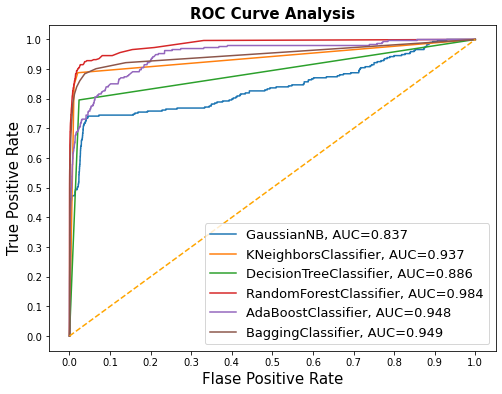

In [213]:
# Plotting ROC curve 

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()


In [ ]:
                                              THANK YOU